# Курсовая работа. Блок ML Beginner
<br>


<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [1]:
# Импортируем необходимые библиотеки
import warnings
from sklearn.feature_selection import mutual_info_classif
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np
from numpy.linalg import inv
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings(action='ignore', category=UserWarning)
data = pd.read_csv(
    'telecom_users.csv')  # Загружаем данные из csv файла в переменную data

data['TotalCharges'] = pd.to_numeric(
    data['TotalCharges'],
    errors='coerce')  # Приводим 'TotalCharges' к числовому типу
data.drop(['Unnamed: 0', 'customerID'], axis=1,
          inplace=True)  # Отбрасываем ненужные нам признаки

В таблице 5986 записей, 20 интересующих нас столбцов, большая часть из которых является типом object, по сути являющиеся категориальным признаком.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


В столбце 'TotalCharges' имеются пропущенные значения - это могут быть клиенты, которые еще не произвели первую оплату, либо некорректные данные. Так как их количество незначительно, мы их отбросим.

In [3]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5976.000000
mean,0.161377,32.468760,64.802213,2298.060617
std,0.367909,24.516391,30.114702,2274.127165
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.650000,404.312500
50%,0.000000,29.000000,70.400000,1412.150000
75%,0.000000,56.000000,89.900000,3846.962500
max,1.000000,72.000000,118.750000,8684.800000


Можно отметить, что среднее значение TotalCharges сильно отличается от медианного в большую сторону, это означает, что есть некоторое количество клиентов, имеющих очень высокие его показатели.

In [4]:
data.describe(include=[object])

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,4399


Самый часто используемый контракт - Month-to-month, метод оплаты - Electronic check. Из всех записей на данный момент, активных клиентов- 4399.

Распределение категориальных признаков


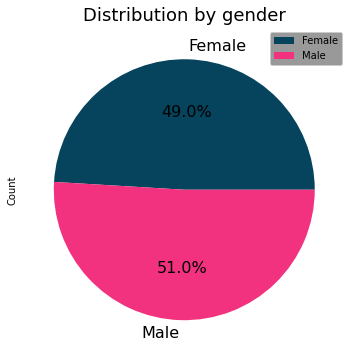

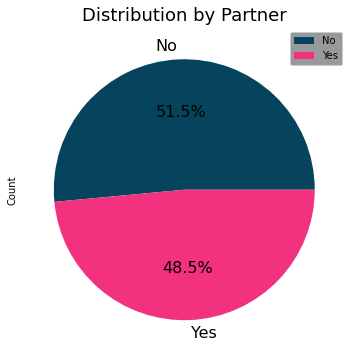

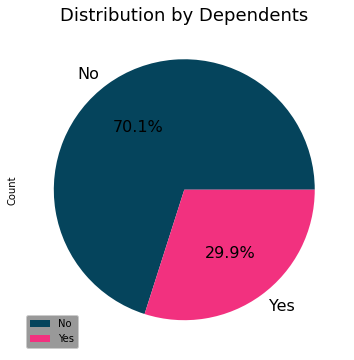

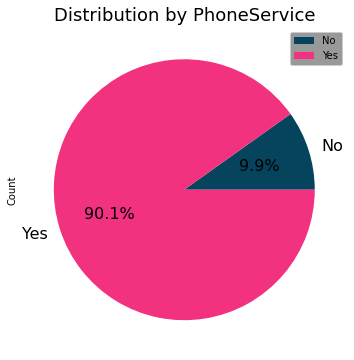

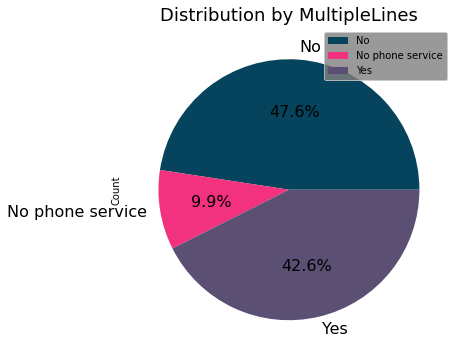

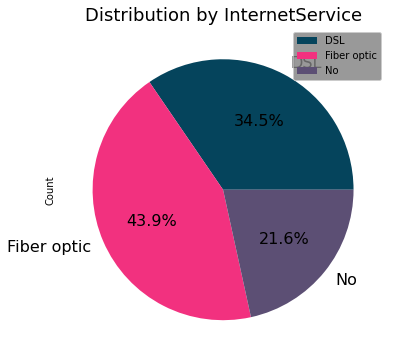

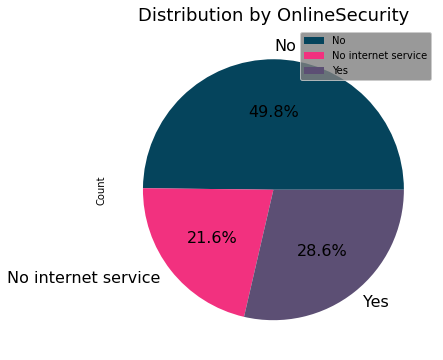

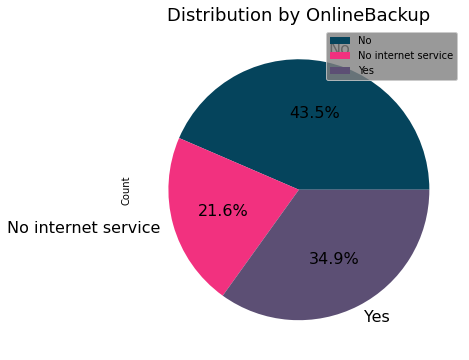

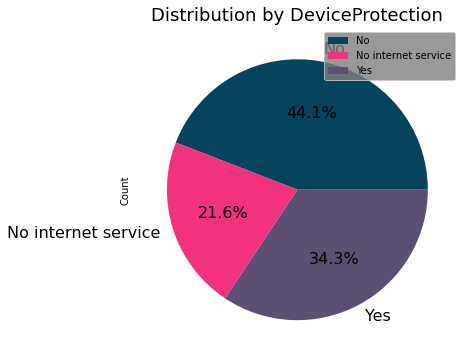

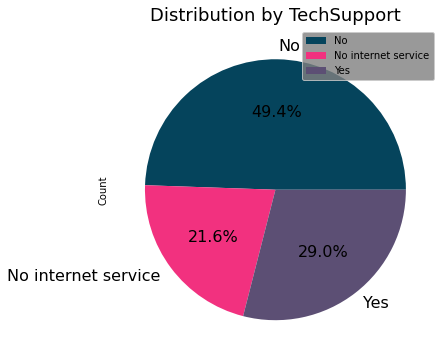

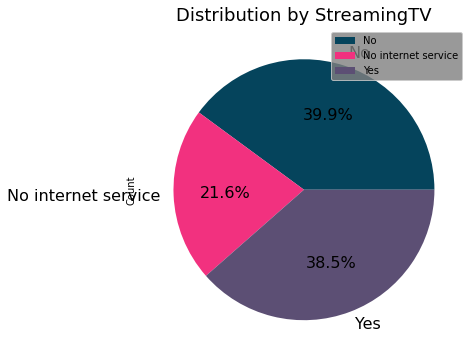

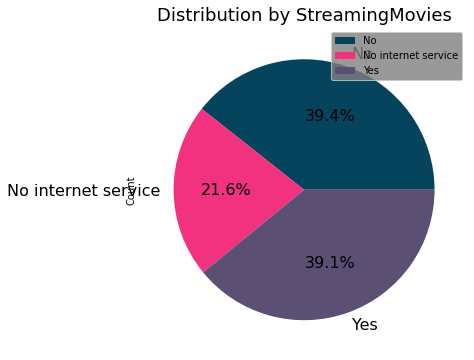

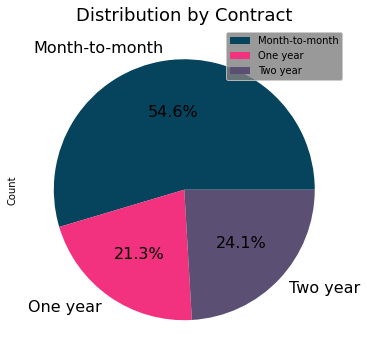

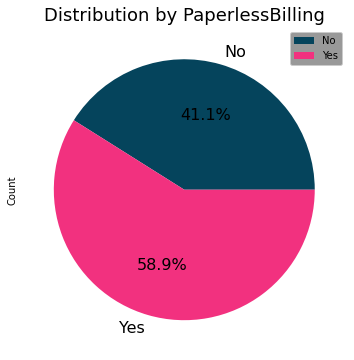

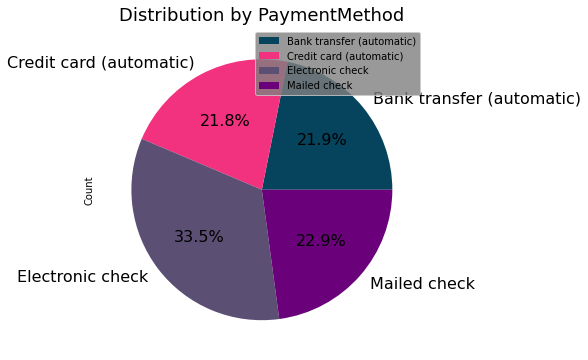

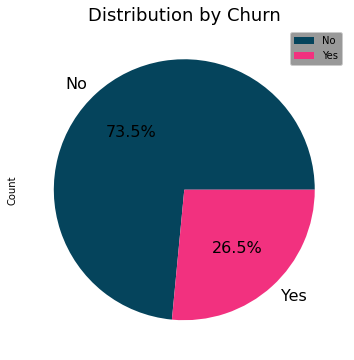

In [5]:
columns_pie = data.describe(
    include=[object]
).columns  # Присваиваем переменной имена столбцов не числовых признаков

colors = ('#05445c', '#f2317f', '#5c4f74', '#6B007B')
for column in columns_pie:  # Проходимся циклом for по списку имен столбцов
    s = data.groupby(column).agg(
        Count=(column, 'size'),
    ).reset_index()  # Присваиваем переменной сгруппированную по столбцу
    # таблицу, используя агрегирующую функцию находим количество клиентов, относящихся к каждой из групп
    plot = s.plot.pie(
        fontsize=16,
        autopct="%.1f%%",
        y='Count',
        labels=s[column],
        colors=colors,
        figsize=(6, 6)
    )  # Строим график с заданными параметрами из полученного в переменную датафрейма
    plt.legend(facecolor='gray')
    plt.title('Distribution by ' + column, fontsize=18)

print('Распределение категориальных признаков')
plt.show()

In [6]:
hm_data = data.copy()

for column in columns_pie:  # Кодируем все столбцы с категориальными признаками значениями количества записей в каждой группе
    hm_data[column] = hm_data[column].map(hm_data.groupby(column).size())

cor = hm_data.corr()  # Создаем корреляционную матрицу и маску

Корреляция между признаками


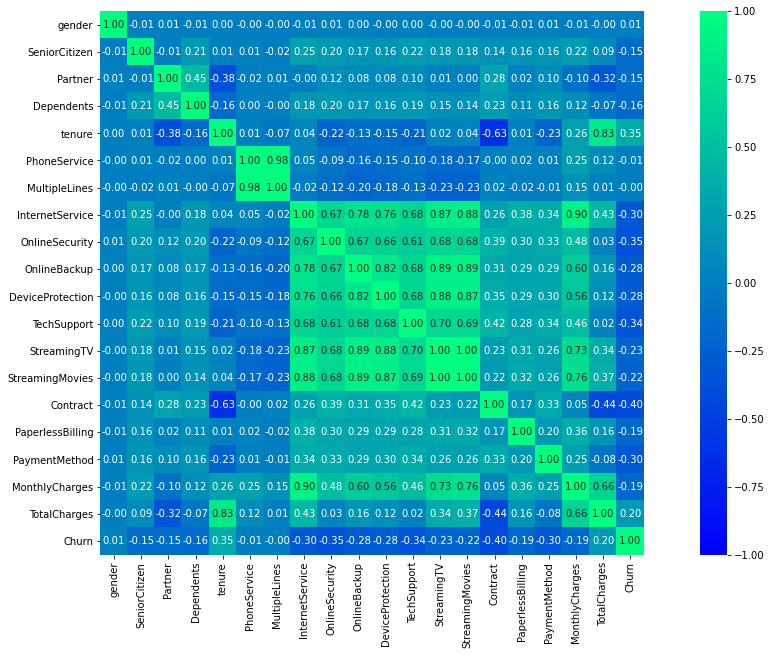

In [7]:
# Строим тепловую карту корреляции между признакми
plt.figure(figsize=(20, 10))
sns.heatmap(
    cor,
    annot=True,
    fmt='.2f',
    square=True,
    vmin=-1,
    vmax=1,
    center=0,
    cmap='winter',
)
print('Корреляция между признаками')
plt.show()

По тепловой карте видно сильную зависимоть дополнительных услуг друг от друга. Также имеется большая зависимость между 'MonthlyCharges' и 'InternetService'. На целевой признак 'Churn' больше всего напрямую влияют следующие признаки: 'tenure', 'contract', 'PaymentMethod', а также все дополнительные услуги, не касающиеся стриминговых сервисов.

# 2. Исследование зависимостей и формулирование гипотез

# Рассмотрим распределение оттока по более значимым признакам

In [8]:
# Создадим функцию, которая будет по указанию датафрейма и имени столбца возвращать новый датафрейм,
# сгруппированный по этому столбцу, с подсчетом количества клиентов, относящихся к каждой подгруппе
def Churn(df, column):
    return data.groupby([column, 'Churn']).agg({
        'Churn': 'count'
    }).rename(columns={
        'Churn': 'count'
    }).reset_index()


# Функция, которая по переданному датафрейму определенного формата, заданного функцией Churn, строит pie-графики распределения
def pie_churn(df):
    key = df.columns[
        0]  # Присваиваем переменной key имена всех столбцов переданного датафрейма
    for i in df[key].unique(
    ):  # Циклом проходим по всем уникальным именам столбцов
        if str(i) != 'No internet service':
            s = df[
                df[key] ==
                i]  # Создаем датафрейм со значениями интересующего нас признака и строим график
            s.plot.pie(fontsize=16,
                       autopct="%.1f%%",
                       y='count',
                       labels=s['Churn'],
                       colors=colors,
                       figsize=(6, 6))
            plt.legend(facecolor='gray')
            plt.title('Churn by ' + key + ' = ' + str(i), fontsize=18)
            # Выводим заголовок

In [9]:
senior = Churn(data, 'SeniorCitizen')

senior

,SeniorCitizen,Churn,count
0,0,No,3835
1,0,Yes,1185
2,1,No,564
3,1,Yes,402


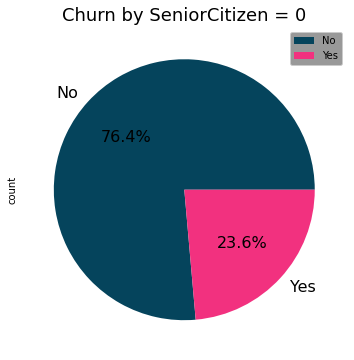

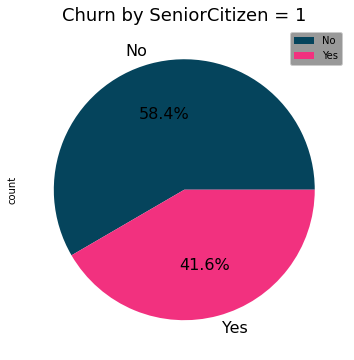

In [10]:
pie_churn(senior)

Пенсионеры отказываются от услуг чаще, чем остальные.

In [11]:
partner = Churn(data, 'Partner')

partner

,Partner,Churn,count
0,No,No,2071
1,No,Yes,1011
2,Yes,No,2328
3,Yes,Yes,576


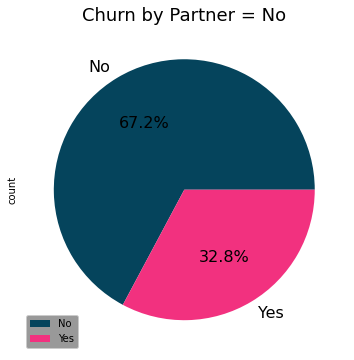

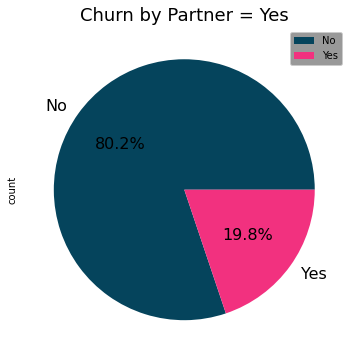

In [12]:
pie_churn(partner)

Клиенты, состоящие в браке, отказываются от услуг значительно реже, чем те, кто в браке не состоит.

In [13]:
depend = Churn(data, 'Dependents')
depend

,Dependents,Churn,count
0,No,No,2889
1,No,Yes,1306
2,Yes,No,1510
3,Yes,Yes,281


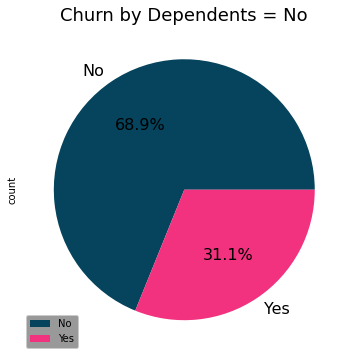

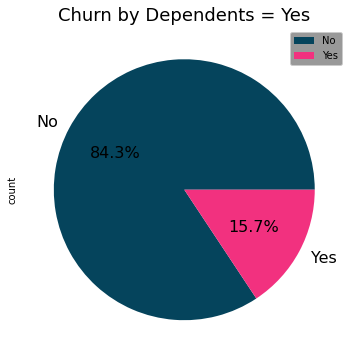

In [14]:
pie_churn(depend)

Клиенты с иждивенцами реже отказываются от услуг. Как и при условии наличия партнера, скорее всего это связано с тем, что такие люди реже переезжают, а так же меньше склонны к переменам.

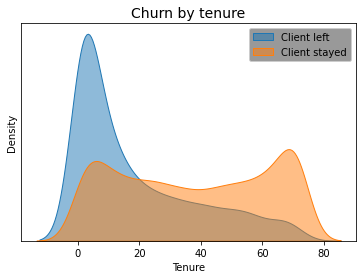

In [15]:
# Строим графики значения tenure для клиентов по признаку оттока
sns.kdeplot(data.query('Churn == "Yes"')['tenure'],
            shade=True,
            label='Client left',
            alpha=0.5)
sns.kdeplot(data.query('Churn == "No"')['tenure'],
            shade=True,
            label='Client stayed',
            alpha=0.5)
plt.xlabel('Tenure')
plt.yticks([])
plt.title('Churn by tenure', fontsize=14)
plt.legend(facecolor='gray')
plt.show()

Чем меньше клиент пользуется услугами, тем больше шанс что он уйдет, и наоборот.

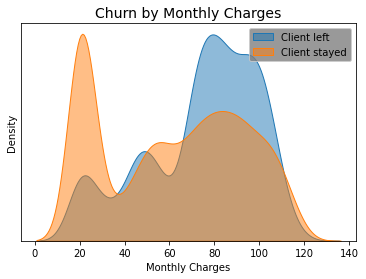

In [16]:
# Строим графики значения MonthlyCharges для клиентов по признаку оттока
sns.kdeplot(data.query('Churn == "Yes"')['MonthlyCharges'],
            shade=True,
            label='Client left',
            alpha=0.5)
sns.kdeplot(data.query('Churn == "No"')['MonthlyCharges'],
            shade=True,
            label='Client stayed',
            alpha=0.5)
plt.xlabel('Monthly Charges')
plt.yticks([])
plt.title('Churn by Monthly Charges', fontsize=14)
plt.legend(facecolor='gray')
plt.show()

Чем ниже месячная оплата услуг у клиента, тем выше вероятность, что он не перестанет пользоваться услугами.

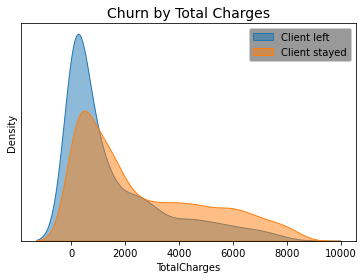

In [17]:
# Строим графики значения TotalCharges для клиентов по признаку оттока
sns.kdeplot(data.query('Churn == "Yes"')['TotalCharges'],
            shade=True,
            label='Client left',
            alpha=0.5)
sns.kdeplot(data.query('Churn == "No"')['TotalCharges'],
            shade=True,
            label='Client stayed',
            alpha=0.5)
plt.xlabel('TotalCharges')
plt.yticks([])
plt.legend()
plt.title('Churn by Total Charges', fontsize=14)
plt.legend(facecolor='gray')
plt.show()

Здесь также видно зависимость, что большая часть клиентов уходит в первые месяцы пользования услугами компании.

Можно наверняка сказать, что чем меньше клиент платит и чем дольше он пользуется услугами компании, тем меньше шанс его оттока, а значит показатели tenure и MonthlyCharges наверняка будут полезны для обучения модели.

In [18]:
Internet = Churn(data, 'InternetService')
Internet

,InternetService,Churn,count
0,DSL,No,1671
1,DSL,Yes,397
2,Fiber optic,No,1536
3,Fiber optic,Yes,1091
4,No,No,1192
5,No,Yes,99


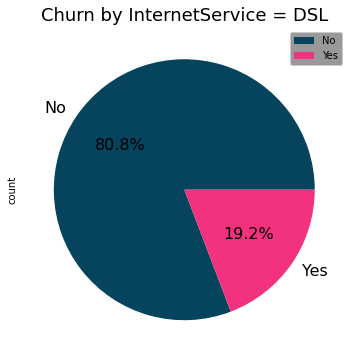

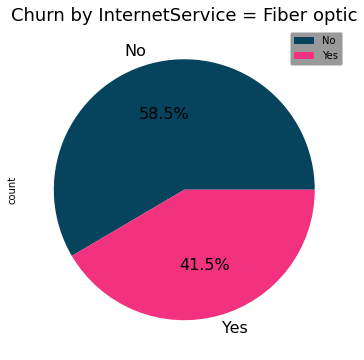

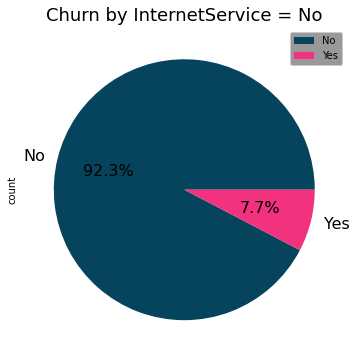

In [19]:
pie_churn(Internet)

Люди, которые не пользуются интернетом, отказываются от услуг значительно реже остальных, чего нельзя сказать про клиентов с Fiber Optic. Они уходят в два раза чаще тех, у кого DSL. Можно сделать вывод, что слабая сторона компании - интернет-услуги, в особенности Fiber Optic.

In [20]:
OnlineSec = Churn(data, 'OnlineSecurity')

OnlineSec

,OnlineSecurity,Churn,count
0,No,No,1740
1,No,Yes,1242
2,No internet service,No,1192
3,No internet service,Yes,99
4,Yes,No,1467
5,Yes,Yes,246


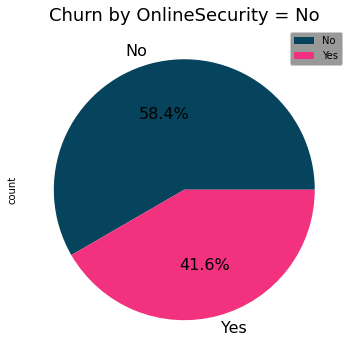

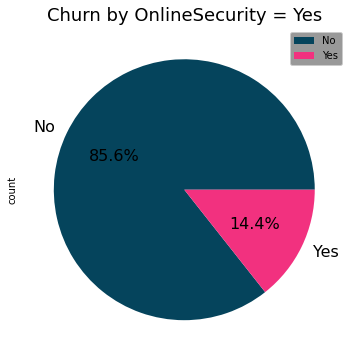

In [21]:
pie_churn(OnlineSec)

In [22]:
backup = Churn(data, 'OnlineBackup')

backup

,OnlineBackup,Churn,count
0,No,No,1567
1,No,Yes,1038
2,No internet service,No,1192
3,No internet service,Yes,99
4,Yes,No,1640
5,Yes,Yes,450


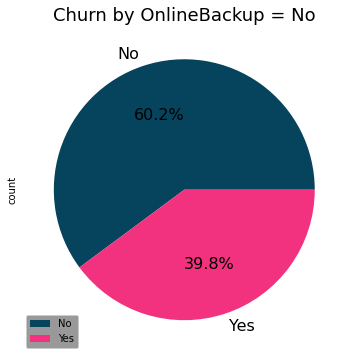

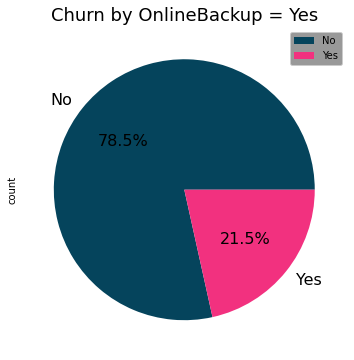

In [23]:
pie_churn(backup)

In [24]:
protec = Churn(data, 'DeviceProtection')

protec

,DeviceProtection,Churn,count
0,No,No,1609
1,No,Yes,1031
2,No internet service,No,1192
3,No internet service,Yes,99
4,Yes,No,1598
5,Yes,Yes,457


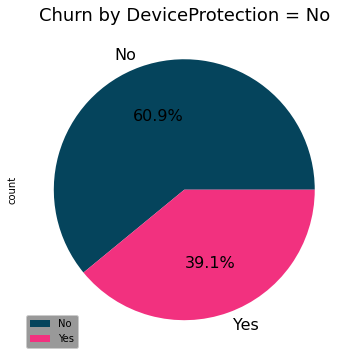

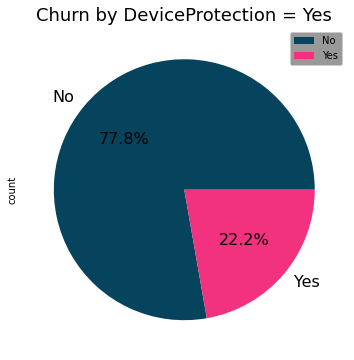

In [25]:
pie_churn(protec)

In [26]:
tech = Churn(data, 'TechSupport')

tech

,TechSupport,Churn,count
0,No,No,1738
1,No,Yes,1222
2,No internet service,No,1192
3,No internet service,Yes,99
4,Yes,No,1469
5,Yes,Yes,266


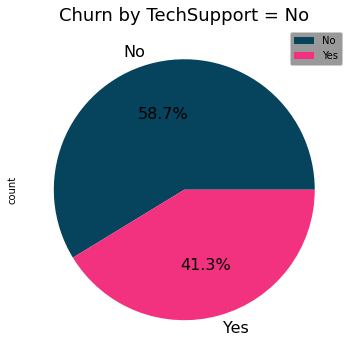

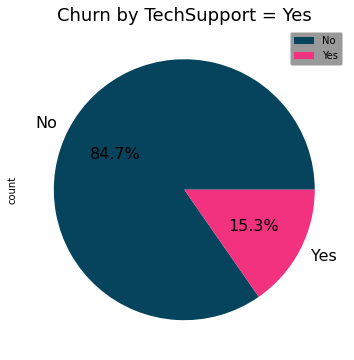

In [27]:
pie_churn(tech)

Можно наверняка сказать о том, что люди, пользующиеся дополнительными услугами, уходят намного реже тех, кто их не подключает.

In [28]:
TV = Churn(data, 'StreamingTV')

TV

,StreamingTV,Churn,count
0,No,No,1590
1,No,Yes,799
2,No internet service,No,1192
3,No internet service,Yes,99
4,Yes,No,1617
5,Yes,Yes,689


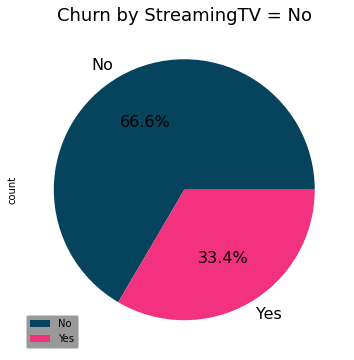

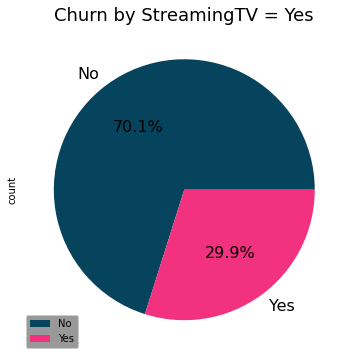

In [29]:
pie_churn(TV)

In [30]:
Movies = Churn(data, 'StreamingMovies')

Movies

,StreamingMovies,Churn,count
0,No,No,1564
1,No,Yes,792
2,No internet service,No,1192
3,No internet service,Yes,99
4,Yes,No,1643
5,Yes,Yes,696


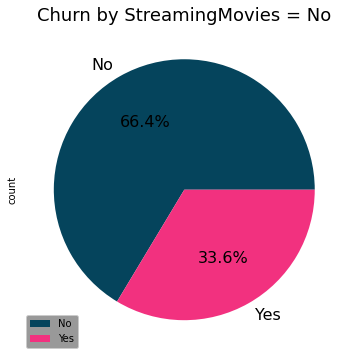

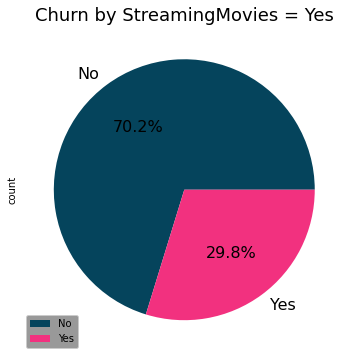

In [31]:
pie_churn(Movies)

Что касается стриминговых сервисов, тут разница между соотношениями невелика. Это может говорить о том, что нет необходимости использовать эти признаки для обучения модели.

In [32]:
contract = Churn(data, 'Contract')
contract

,Contract,Churn,count
0,Month-to-month,No,1871
1,Month-to-month,Yes,1398
2,One year,No,1128
3,One year,Yes,148
4,Two year,No,1400
5,Two year,Yes,41


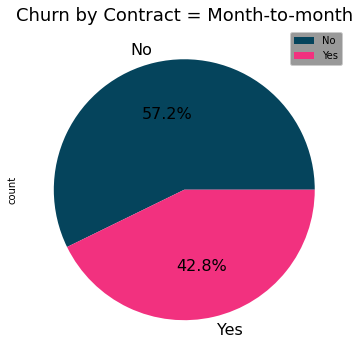

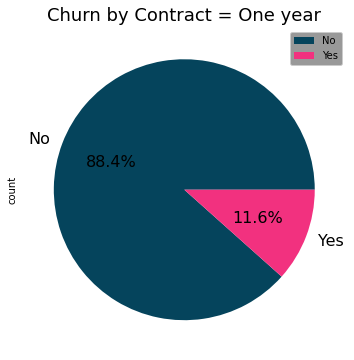

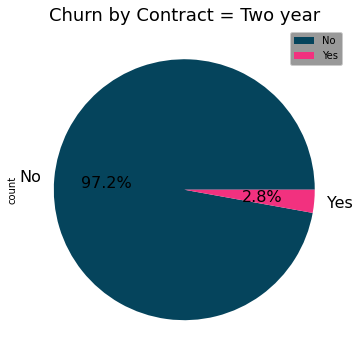

In [33]:
pie_churn(contract)

Люди с долгосрочными контрактами уходят намного реже. Основная масса ушедших клиентов пользовалась помесячной оплатой,  это означает, что признак стоит рассмотреть как подходящий для обучения модели.

In [34]:
paper = Churn(data, 'PaperlessBilling')
paper

,PaperlessBilling,Churn,count
0,No,No,2052
1,No,Yes,406
2,Yes,No,2347
3,Yes,Yes,1181


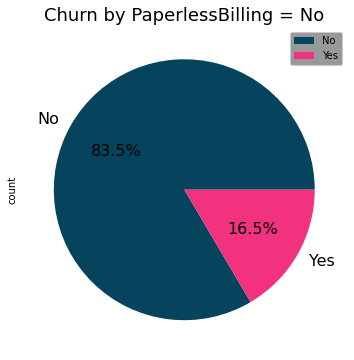

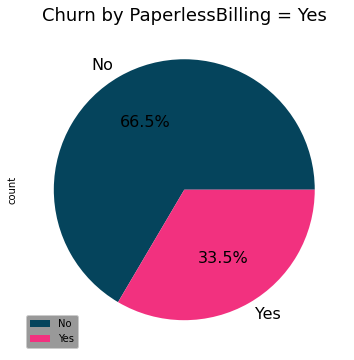

In [35]:
pie_churn(paper)

In [36]:
payment = Churn(data, 'PaymentMethod')
payment

,PaymentMethod,Churn,count
0,Bank transfer (automatic),No,1084
1,Bank transfer (automatic),Yes,224
2,Credit card (automatic),No,1105
3,Credit card (automatic),Yes,198
4,Electronic check,No,1104
5,Electronic check,Yes,902
6,Mailed check,No,1106
7,Mailed check,Yes,263


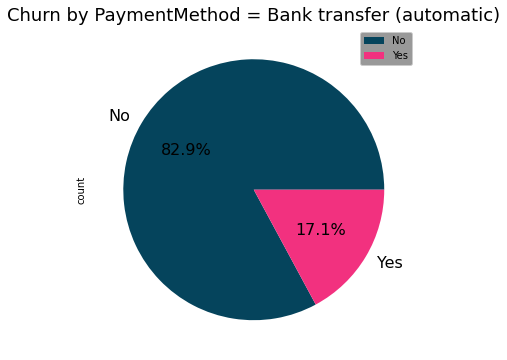

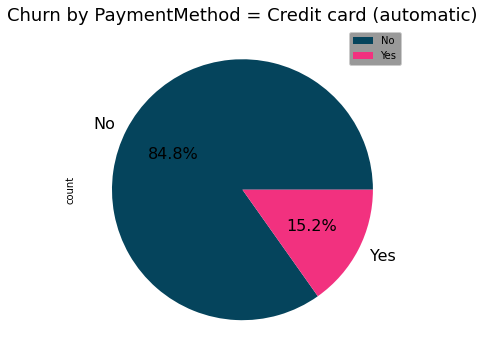

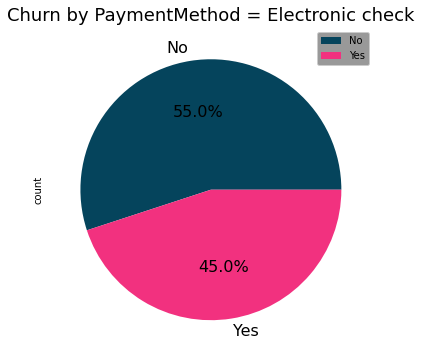

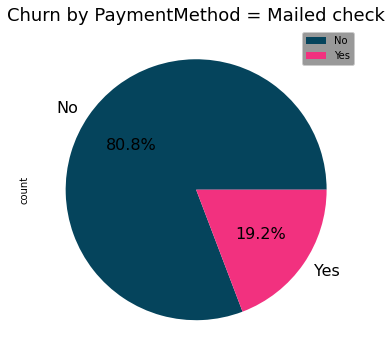

In [37]:
pie_churn(payment)

Вероятность оттока клиентов, использующих безбумажный биллинг и оплату услуг электронным чеком, более высока.

# Гипотеза №1

Люди, подключающие дополнительные интернет-услуги, уходят значительно реже других. Возможно, стоит создать новый категориальный признак, объединяющий все значимые  услуги и разделяющий всех клиентов на кластеры.

In [38]:
# Создаем таблицу признаков, выделяем из нее целевой признак Churn
X = data.copy().dropna()  
y = X.pop("Churn")
y = y.map({'No': 0, 'Yes': 1})
# Кодируем признаки типа "object" методом factorize
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()  

# Создаем список дискретных признаков для дальнейшей его передачи в функцию
discrete_features = X.dtypes == int
 # Находим значения Mi score для определения зависимости целевого признака от остальных
mi_scores = mutual_info_classif(
    X, y, discrete_features=discrete_features) 
# Приводим значения к удобному для чтения виду
mi_scores = pd.Series(
    mi_scores, name="MI Scores",
    index=X.columns)  
# Сортируем значения по убыванию
mi_scores = mi_scores.sort_values(
    ascending=False)  

In [39]:
mi_scores

Contract            0.102662
tenure              0.068965
OnlineSecurity      0.067177
TechSupport         0.060031
InternetService     0.052217
PaymentMethod       0.049643
MonthlyCharges      0.046467
TotalCharges        0.045417
OnlineBackup        0.042953
DeviceProtection    0.041122
StreamingMovies     0.034095
StreamingTV         0.031984
Dependents          0.016105
PaperlessBilling    0.015883
SeniorCitizen       0.007591
Partner             0.002820
PhoneService        0.001112
MultipleLines       0.000000
gender              0.000000
Name: MI Scores, dtype: float64

MI Scores у таких показателей, как "OnlineSecurity", "TechSupport", "DeviceProtection","OnlineBackup" довольно весомый. Однако, можно предположить, что если использовать метод K-Mean, то можно создать новый категориальный признак, который бы разделил всех клиентов на группы по этим признакам и имел бы большее влияние, чем каждый признак по отдельности, тем самым увеличив показатели модели.

In [40]:
kmeans = KMeans(n_clusters=6)  # Создаем переменную класса KMeans
X["AddServices"] = kmeans.fit_predict(
    X[['TechSupport', 'OnlineSecurity', 'DeviceProtection', 'OnlineBackup']])
# Создаем новую колонку "AddServices" и присваиваем ей значения предсказаний модели по интересующим нас столбцам

In [41]:
# Убираем лишние столбцы
X.drop(columns=[
    'OnlineSecurity', 'TechSupport', 'DeviceProtection', 'OnlineBackup'
], inplace=True)  
discrete_features = X.dtypes == int
# Проверяем значения MI score для нового датафрейма
mi_scores = mutual_info_classif(
    X, y, discrete_features=discrete_features
) 
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

Contract            0.097454
AddServices         0.080405
tenure              0.067968
InternetService     0.050053
MonthlyCharges      0.047365
TotalCharges        0.043265
PaymentMethod       0.042504
StreamingMovies     0.033658
StreamingTV         0.028534
PaperlessBilling    0.024270
SeniorCitizen       0.018241
Dependents          0.008019
PhoneService        0.003182
gender              0.000927
MultipleLines       0.000474
Partner             0.000000
Name: MI Scores, dtype: float64

In [42]:
#data = data.join(X['AddServices'])

Применив модель K-means, мы получили новый признак AddServices, который имеет большее влияние на целевой признак оттока. Таким образом, мы уменьшили количество передаваемых признаков, что может в лучшую сторону сказаться на точности и, вероятно, уменьшить переобучаемость модели.

# Гипотеза №2

Клиенты, ежемесячный платеж которых на данный момент выше среднего, вероятно, имеют больший шанс отказаться от услуг. Исходя из этого, можно создать новый признак, который будет отражать разницу между средним платежом клиента за все время и текущим показателем ежемесячного платежа.

In [43]:
# Находим средний платеж у каждого клиента,
X['MonthlyDiff'] = (X['TotalCharges'] / X['tenure']) - X['MonthlyCharges']
# Отнимаем текущий показатель MonhlyCharges
data['MonthlyDiff'] = X['MonthlyDiff']

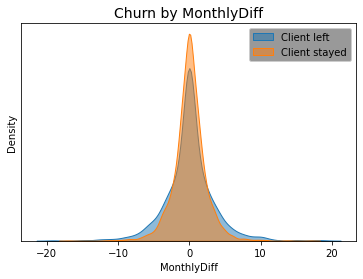

In [44]:
sns.kdeplot(data.query('Churn == "Yes"')['MonthlyDiff'],
            shade=True,
            label='Client left',
            alpha=0.5)
sns.kdeplot(data.query('Churn == "No"')['MonthlyDiff'],
            shade=True,
            label='Client stayed',
            alpha=0.5)
plt.xlabel('MonthlyDiff')
plt.yticks([])
plt.title('Churn by MonthlyDiff', fontsize=14)
plt.legend(facecolor='gray')
plt.show()

In [45]:
discrete_features = X.dtypes == int
mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

Contract            0.088292
AddServices         0.080405
tenure              0.071059
InternetService     0.059101
MonthlyCharges      0.048879
TotalCharges        0.044600
PaymentMethod       0.044466
MonthlyDiff         0.043706
StreamingTV         0.038308
StreamingMovies     0.031726
PaperlessBilling    0.017800
Partner             0.010853
Dependents          0.009644
MultipleLines       0.007384
SeniorCitizen       0.005109
PhoneService        0.000000
gender              0.000000
Name: MI Scores, dtype: float64

Судя по графику, разница в оплате практически не влияет на отток. Mi Score у нового признака также не впечатляет, гипотеза не подтверждена, данный признак использовать для обучения модели мы не будем.

In [46]:
data.drop(columns='MonthlyDiff', inplace=True)  # Убираем неподходяший признак
X.drop(columns='MonthlyDiff', inplace=True)

# Гипотеза №3

Признаки Monthly Charges и Internet Service имеют большую зависимость друг от друга, так что можно создать новый признак из этих двух.

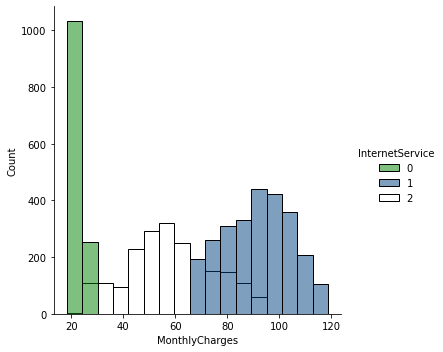

In [47]:
# Строим график ежемесячных платежей по InternetService
sns.displot(data=X,
            x='MonthlyCharges',
            hue='InternetService',
            kind='hist',
            palette='ocean')
plt.show()

Видно, что зависимость ярко выражена, однако графики Fiber Optic и DSL накладываются друг на друга. Попробуем исправить это, путем создания нового признака Monthly*IS. 

In [48]:
# Создаем новый признак, путем перемножения
X['Monthly*IS'] = X['InternetService'].map({
    0: 1,
    1: 3,
    2: 2
}) * X['MonthlyCharges']

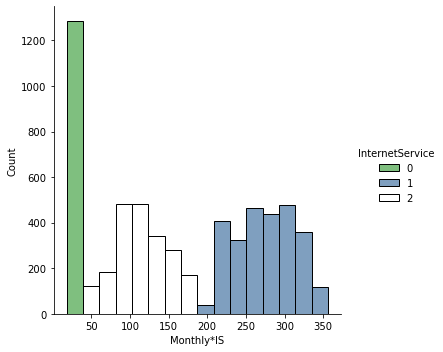

In [49]:
sns.displot(data=X,
            x='Monthly*IS',
            hue='InternetService',
            kind='hist',
            palette='ocean')  # Строим график с новым признаком
plt.show()

Видно, что благодаря новому признаку графики не накладываются друг на друга, теперь можно проверить MI Score нового признака.

In [50]:
# Убираем лишние признаки, проверяем Mi Score
X.drop(columns=['InternetService', 'MonthlyCharges'], inplace=True)
discrete_features = X.dtypes == int
mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

Contract            0.093222
Monthly*IS          0.086214
AddServices         0.080405
tenure              0.072663
TotalCharges        0.045350
PaymentMethod       0.043999
StreamingTV         0.041007
StreamingMovies     0.024352
Dependents          0.021421
PaperlessBilling    0.019376
Partner             0.017775
SeniorCitizen       0.013462
gender              0.000000
PhoneService        0.000000
MultipleLines       0.000000
Name: MI Scores, dtype: float64

Новый признак имеет лучший MI Score, чем исходные признаки, значит для обучения модели мы будем использовать его.

# Вывод

Исходя из изучения зависимостей и проверки гипотез, можно выделить самые полезные признаки для предсказания целевого признака оттока (Churn):
1. Contract
2. Monthly*IS (MonthlyCharges * InternetService)
3. AddServices (k-mean for 'TechSupport', 'OnlineSecurity', 'DeviceProtection', 'OnlineBackup')
4. tenure

# 3. Построение моделей для прогнозирования оттока

Для решения поставленной задачи нам необходимо распределить всех клиентов на 2 группы - склонные к оттоку и не склонные к оттоку. Это означает, что нам подойдут методы, решающие задачи классификации.

В поиске клиентов, которые могут отказаться от услуг, самыми главными показателями являются recall и accuracy. Precision, вероятно, является не настолько важной, т.к. даже если мы классифицируем лояльного клиента неверно, можно будет повысить его лояльность какими-либо специальными предложениями. Однако, если мы пропустим клиентов, склонных к оттоку, то вероятность их ухода будет высока, а в нашем случае лучше не потерять клиента, чем привлечь нового, т.к. со временем шанс оттока любого клиента понижается.

Для решения задачи мы будем использовать 9 ML моделей:

1. AdaBoost Classifier
2. Gradient Boosting Classifier
3. Random Forest Classifier
4. Decision Tree Classifier
5. Gaussian Naive Bayes
6. Logistic Regression
7. Linear Discriminant Analysis
8. XGB Classifier
9. C-Support Vector Classification.

In [51]:
# Импортируем библиотеки, необходимые для работы
from sklearn.model_selection import train_test_split, \
    StratifiedKFold, GridSearchCV, cross_val_predict, StratifiedShuffleSplit, cross_val_score, cross_validate
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, \
    RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost as XGB
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, \
    precision_score, recall_score, f1_score, classification_report, SCORERS, roc_curve, silhouette_score, adjusted_mutual_info_score

In [52]:
# Оставляем только самые полезные признаки, разбиваем датасет на тренировочную и тестовую выборки

X = normalize(X[['Contract', 'AddServices', 'Monthly*IS', 'tenure']])

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y)

In [53]:
# Создаем объект класса StratifiedKFold для использования в будущем
skf = StratifiedKFold(n_splits=5, shuffle=True)

In [54]:
# Инициализируем функцию для поиска оптимальных гипернастроек с указанием целевой метрики качества
def GridSearch(metr='roc_auc'):

    scale_pos_weight = y_train[y_train == 0].size / y_train[y_train == 1].size
    # Определяем интересующие нас гиперпараметры для каждой модели
    xgb_params_grid = {
        'n_estimators': np.arange(10, 210, 40),
        'max_depth': np.arange(1, 8, 1),
        'scale_pos_weight': scale_pos_weight / np.arange(0.9, 2, 0.2),
        'learning_rate': np.arange(0.1, 1.1, 0.1)
    }

    ada_params_grid = {
        'n_estimators': np.arange(10, 211, 25),
        'learning_rate': np.arange(0.1, 1.1, 0.1)
    }

    gb_params_grid = {
        'n_estimators': np.arange(10, 211, 40),
        'learning_rate': np.arange(0.1, 1.1, 0.1),
        'max_depth': np.arange(1, 8, 1),
    }

    rf_params_grid = {
        'n_estimators':
        np.arange(10, 210, 50),
        'max_depth':
        np.arange(1, 8, 1),
        'criterion': ['gini', 'entropy'],
        'class_weight': [{
            1: weight
        } for weight in np.arange(1, 4, 0.2)] + ['balanced']
    }

    dt_params_grid = {
        'max_depth':
        np.arange(1, 8, 1),
        'criterion': ['gini', 'entropy'],
        'class_weight': [{
            1: weight
        } for weight in np.arange(1.4, 5, 0.1)] + ['balanced']
    }

    gnb_params_grid = {'var_smoothing': np.logspace(0, -9, num=100)}

    lr_params_grid = {
        'C':
        np.arange(0.1, 1.1, 0.1),
        'class_weight': [{
            1: weight
        } for weight in np.arange(1.4, 4, 0.1)] + ['balanced']
    }

    lda_params_grid = {
        'store_covariance': [False, True],
        'solver': ['svd', 'lsqr', 'eigen'],
        'tol': [1e-2, 1e-3, 1e-4]
    }

    svc_params_grid = {
        'C':
        np.arange(1, 251, 50),
        'gamma': ['scale', 'auto'],
        'decision_function_shape': ['ovo', 'ovr'],
        'class_weight': [{
            1: weight
        } for weight in np.arange(1.6, 4, 0.2)] + ['balanced']
    }

    # Создаем объекты класса GridSearchCV, указывая модель, сетку параметров, метрику качества.
    xgb_grid = GridSearchCV(XGBClassifier(), xgb_params_grid, metr, cv=skf)
    ada_grid = GridSearchCV(AdaBoostClassifier(),
                            ada_params_grid,
                            metr,
                            cv=skf)
    gb_grid = GridSearchCV(GradientBoostingClassifier(),
                           gb_params_grid,
                           metr,
                           cv=skf)
    rf_grid = GridSearchCV(RandomForestClassifier(),
                           rf_params_grid,
                           metr,
                           cv=skf)
    dt_grid = GridSearchCV(DecisionTreeClassifier(),
                           dt_params_grid,
                           metr,
                           cv=skf)
    gnb_grid = GridSearchCV(GaussianNB(), gnb_params_grid, metr, cv=skf)
    lr_grid = GridSearchCV(LogisticRegression(), lr_params_grid, metr, cv=skf)
    lda_grid = GridSearchCV(LinearDiscriminantAnalysis(),
                            lda_params_grid,
                            metr,
                            cv=skf)
    svc_grid = GridSearchCV(SVC(), svc_params_grid, metr, cv=skf)
    # Ищем подходящие параметры на тренировочных данных
    xgb_grid.fit(X_train, y_train)
    ada_grid.fit(X_train, y_train)
    dt_grid.fit(X_train, y_train)
    lr_grid.fit(X_train, y_train)
    gnb_grid.fit(X_train, y_train)
    svc_grid.fit(X_train, y_train)
    lda_grid.fit(X_train, y_train)
    rf_grid.fit(X_train, y_train)
    gb_grid.fit(X_train, y_train)

    # Выводим результаты оценок моделей с лучшими гиперпараметрами
    print('scores of the models with the best params: \n',
          xgb_grid.cv_results_['mean_test_score'].max(),
          ada_grid.cv_results_['mean_test_score'].max(),
          gb_grid.cv_results_['mean_test_score'].max(),
          rf_grid.cv_results_['mean_test_score'].max(),
          dt_grid.cv_results_['mean_test_score'].max(),
          gnb_grid.cv_results_['mean_test_score'].max(),
          lr_grid.cv_results_['mean_test_score'].max(),
          lda_grid.cv_results_['mean_test_score'].max(),
          svc_grid.cv_results_['mean_test_score'].max())

    # Возвращаем лучшие параметры, полученные в результате поиска
    return [
        xgb_grid.best_params_, ada_grid.best_params_, dt_grid.best_params_,
        lr_grid.best_params_, gnb_grid.best_params_, svc_grid.best_params_,
        lda_grid.best_params_, rf_grid.best_params_, gb_grid.best_params_
    ]

In [55]:
# %%time
# #Вызываем функцию с указанием интересующей нас метрики, присваиваем значения в новые переменные
# xgb_params_grid, ada_params_grid, dt_params_grid, lr_params_grid, gnb_params_grid, svc_params_grid, lda_params_grid, rf_params_grid, gb_params_grid = GridSearch(metr='f1')

In [56]:
# Лучшие параметры, найденные для моделей, с указанием целевой метрики качества RECALL
xgb_params_grid_r = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'use_label_encoder': False,
    'learning_rate': 0.2,
    'max_depth': 1,
    'n_estimators': 10,
    'scale_pos_weight': 3.0741616320812537
}

ada_params_grid_r = {'learning_rate': 0.7000000000000001, 'n_estimators': 210}

gb_params_grid_r = {'learning_rate': 0.9, 'max_depth': 5, 'n_estimators': 10}

rf_params_grid_r = {
    'class_weight': {
        1: 3.5999999999999996
    },
    'criterion': 'gini',
    'max_depth': 1,
    'n_estimators': 160
}

dt_params_grid_r = {
    'class_weight': {
        1: 2.0000000000000004
    },
    'criterion': 'entropy',
    'max_depth': 1
}

gnb_params_grid_r = {'var_smoothing': 3.5111917342151277e-08}

lr_params_grid_r = {'C': 0.1, 'class_weight': {1: 3.900000000000002}}

lda_params_grid_r = {'solver': 'lsqr', 'store_covariance': False, 'tol': 0.01}

svc_params_grid_r = {
    'C': 1,
    'class_weight': {
        1: 3.7999999999999994
    },
    'decision_function_shape': 'ovo',
    'gamma': 'scale'
}

meta_params_r = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'use_label_encoder': False,
    'learning_rate': 0.1,
    'max_depth': 5,
    'n_estimators': 50,
    'scale_pos_weight': 3.0741616320812537
}

In [57]:
# Лучшие параметры, найденные для моделей, с указанием целевой метрики качества ROC-AUC
xgb_params_grid_roc = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'use_label_encoder': False,
    'learning_rate': 0.30000000000000004,
    'max_depth': 1,
    'n_estimators': 90,
    'scale_pos_weight': 1.627497334631252
}

ada_params_grid_roc = {'learning_rate': 0.1, 'n_estimators': 135}

gb_params_grid_roc = {
    'learning_rate': 0.1,
    'max_depth': 1,
    'n_estimators': 210
}

rf_params_grid_roc = {
    'class_weight': {
        1: 2.9999999999999996
    },
    'criterion': 'entropy',
    'max_depth': 6,
    'n_estimators': 110
}

dt_params_grid_roc = {
    'class_weight': {
        1: 2.700000000000001
    },
    'criterion': 'gini',
    'max_depth': 5
}

gnb_params_grid_roc = {'var_smoothing': 6.579332246575682e-09}

lr_params_grid_roc = {'C': 0.1, 'class_weight': 'balanced'}

lda_params_grid_roc = {'solver': 'svd', 'store_covariance': False, 'tol': 0.01}

svc_params_grid_roc = {
    'C': 1,
    'class_weight': {
        1: 2.8
    },
    'decision_function_shape': 'ovo',
    'gamma': 'scale'
}

meta_params_roc = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'use_label_encoder': False,
    'learning_rate': 0.4,
    'max_depth': 4,
    'n_estimators': 10,
    'scale_pos_weight': 2.1282657452870217
}

In [58]:
# Лучшие параметры, найденные для моделей, с указанием целевой метрики качества f1
xgb_params_grid_f1 = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'use_label_encoder': False,
    'learning_rate': 0.30000000000000004,
    'max_depth': 4,
    'n_estimators': 10,
    'scale_pos_weight': 2.515223153521026
}

ada_params_grid_f1 = {'learning_rate': 0.2, 'n_estimators': 160}

gb_params_grid_f1 = {'learning_rate': 0.9, 'max_depth': 3, 'n_estimators': 10}

rf_params_grid_f1 = {
    'class_weight': {
        1: 2.3999999999999995
    },
    'criterion': 'entropy',
    'max_depth': 6,
    'n_estimators': 160
}

dt_params_grid_f1 = {
    'class_weight': {
        1: 1.4
    },
    'criterion': 'entropy',
    'max_depth': 5
}

gnb_params_grid_f1 = {'var_smoothing': 2.848035868435799e-07}

lr_params_grid_f1 = {'C': 0.2, 'class_weight': {1: 3.1000000000000014}}

lda_params_grid_f1 = {'solver': 'svd', 'store_covariance': False, 'tol': 0.01}

svc_params_grid_f1 = {
    'C': 201,
    'class_weight': {
        1: 1.8
    },
    'decision_function_shape': 'ovo',
    'gamma': 'scale'
}

meta_params_f1 = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'use_label_encoder': False,
    'learning_rate': 0.6,
    'max_depth': 3,
    'n_estimators': 10,
    'scale_pos_weight': 2.1282657452870217
}

In [59]:
# Создаем объекты класса моделей, указывая лучшие параметры, найденные заранее методом GridSearchCV
xgb_r = XGBClassifier(**xgb_params_grid_r)
ada_r = AdaBoostClassifier(**ada_params_grid_r)
gb_r = GradientBoostingClassifier(**gb_params_grid_r)
rf_r = RandomForestClassifier(**rf_params_grid_r)
dt_r = DecisionTreeClassifier(**dt_params_grid_r)
gnb_r = GaussianNB(**gnb_params_grid_r)
lr_r = LogisticRegression(**lr_params_grid_r)
lda_r = LinearDiscriminantAnalysis(**lda_params_grid_r)
svc_r = SVC(**svc_params_grid_r)

In [60]:
xgb_roc = XGBClassifier(**xgb_params_grid_roc)
ada_roc = AdaBoostClassifier(**ada_params_grid_roc)
gb_roc = GradientBoostingClassifier(**gb_params_grid_roc)
rf_roc = RandomForestClassifier(**rf_params_grid_roc)
dt_roc = DecisionTreeClassifier(**dt_params_grid_roc)
gnb_roc = GaussianNB(**gnb_params_grid_roc)
lr_roc = LogisticRegression(**lr_params_grid_roc)
lda_roc = LinearDiscriminantAnalysis(**lda_params_grid_roc)
svc_roc = SVC(**svc_params_grid_roc)

In [61]:
xgb_f1 = XGBClassifier(**xgb_params_grid_f1)
ada_f1 = AdaBoostClassifier(**ada_params_grid_f1)
gb_f1 = GradientBoostingClassifier(**gb_params_grid_f1)
rf_f1 = RandomForestClassifier(**rf_params_grid_f1)
dt_f1 = DecisionTreeClassifier(**dt_params_grid_f1)
gnb_f1 = GaussianNB(**gnb_params_grid_f1)
lr_f1 = LogisticRegression(**lr_params_grid_f1)
lda_f1 = LinearDiscriminantAnalysis(**lda_params_grid_f1)
svc_f1 = SVC(**svc_params_grid_f1)

In [62]:
# xgb = XGBClassifier(**xgb_params_grid)
# ada = AdaBoostClassifier(**ada_params_grid)
# gb = GradientBoostingClassifier(**gb_params_grid)
# rf = RandomForestClassifier(**rf_params_grid)
# dt = DecisionTreeClassifier(**dt_params_grid)
# gnb = GaussianNB(**gnb_params_grid)
# lr = LogisticRegression(**lr_params_grid)
# lda = LinearDiscriminantAnalysis(**lda_params_grid)
# svc = SVC(**svc_params_grid)

In [63]:
# algs = [xgb, ada, gb, rf, dt, gnb, lr, lda, svc]
algs_f1 = [xgb_f1, ada_f1, gb_f1, rf_f1, dt_f1, gnb_f1, lr_f1, lda_f1, svc_f1]
algs_r = [xgb_r, ada_r, gb_r, rf_r, dt_r, gnb_r, lr_r, lda_r, svc_r]
algs_roc = [
    xgb_roc, ada_roc, gb_roc, rf_roc, dt_roc, gnb_roc, lr_roc, lda_roc, svc_roc
]
# Создаем список всех алгоритмов, их имен, а так же список с интересующими нас метриками
names = ['xgb', 'ada', 'gb', 'rf', 'dt', 'gnb', 'lr', 'lda', 'svc']
metrics_n = ['roc_auc', 'accuracy', 'precision', 'recall', 'f1']

In [64]:
# Определяем функцию, возвращающую матрицу ответов базовых моделей для дальнейшего поиска оптимальных гиперпараметров для мета алгоритма
def score(models, data_train, targets_train, cv=5):
    meta_mtrx = np.empty((data_train.shape[0], len(models)))
    for n, model in enumerate(models):
        model.fit(data_train, targets_train)
        meta_mtrx[:, n] = model.predict(data_train)
    return meta_mtrx

In [65]:
# #Вызываем функцию, сохраняем матрицу ответов
# matr = score(models=algs, data_train=X_train, targets_train=y_train,)

In [66]:
# scale_pos_weight = y_train[y_train == 0].size / y_train[y_train == 1].size
# xgb_params_grid_search = {
#     'n_estimators': np.arange(10, 210, 40),
#     'max_depth': np.arange(1, 8, 1),
#     'scale_pos_weight': scale_pos_weight / np.arange(0.9, 2, 0.2),
#     'learning_rate': np.arange(0.1, 1.1, 0.1)
# }

In [67]:
# # Определяем объект класса GridSearch
# meta_grid = GridSearchCV(XGBClassifier(), xgb_params_grid_search, 'f1', cv=skf)

In [68]:
# %%time
# #Находим лучшие гиперпараметры для мета алгоритма
# meta_grid.fit(matr, y_train)

In [69]:
# meta_params=meta_grid.best_params_

In [70]:
# Определяем мета алгоритм с зараннее найденными значениями
# meta_alg = XGBClassifier(meta_params)
meta_alg_f1 = XGBClassifier(**meta_params_f1)
meta_alg_r = XGBClassifier(**meta_params_r)
meta_alg_roc = XGBClassifier(**meta_params_roc)

In [71]:
# Создаем функцию stacking, которая обучает базовые модели на данных, сохраняет метрики их качества,
# а так же обучает мета алгоритм и возвращает метрики его качества
def stacking(models,
             meta,
             metrics_n,
             data_train,
             targets_train,
             data_test,
             targets_test=None,
             random_state=None,
             cv=5):
    # Создаем матрицу необходимой размерности, два списка для записи метрик базовых алгоритмов
    meta_mtrx = np.empty((data_train.shape[0], len(models)))
    train_list, test_list = [], []

    # В цикле проходимся по базовым алгоритмам, ,
    for n, model in enumerate(models):
        # Заполняем матрицу предсказаниями базовых алгоритмов
        meta_mtrx[:, n] = cross_val_predict(model,
                                            data_train,
                                            targets_train,
                                            cv=5,
                                            method='predict')
        # Вычисляем метрики для базовых алгоритмов
        valid_train = cross_validate(model,
                                     data_test,
                                     targets_test,
                                     scoring=metrics_n,
                                     cv=skf)
        train_list.append(valid_train)
        model.fit(data_train, targets_train)

    # Проверяем качество работы мета-алгоритма на тренировочных данных, обучаем его
    valid_train_meta = cross_validate(meta,
                                      meta_mtrx,
                                      targets_train,
                                      scoring=metrics_n,
                                      cv=skf)
    meta_model = meta.fit(meta_mtrx, targets_train)
    # Cоздаем матрицу мета-признаков для тестовых данных
    meta_mtrx_test = np.empty((data_test.shape[0], len(models)))
    # В цикле проходим по базовым моделям, заполняем матрицу мета-признаков для тестовых данных, заполняем метрики
    for n, model in enumerate(models):
        meta_mtrx_test[:, n] = model.predict(data_test)
        valid_test = cross_validate(model,
                                    data_test,
                                    targets_test,
                                    scoring=metrics_n,
                                    cv=skf)
        test_list.append(valid_test)
    # Заполняем метрики качества мета-алгоритма на тестовых данныых
    if targets_test is not None:
        valid_test_meta = cross_validate(meta,
                                         meta_mtrx_test,
                                         targets_test,
                                         scoring=metrics_n,
                                         cv=skf)

    # Помещаем метрики качества базовых и мета алгоритма в таблицы для дальнейшего их сравнения
    train_df = pd.DataFrame(train_list, index=names)[[
        'test_roc_auc', 'test_accuracy', 'test_precision', 'test_recall',
        'test_f1'
    ]]
    train_df = train_df.applymap(np.mean)

    test_df = pd.DataFrame(test_list, index=names)[[
        'test_roc_auc', 'test_accuracy', 'test_precision', 'test_recall',
        'test_f1'
    ]]
    test_df = test_df.applymap(np.mean)

    meta_train_df = pd.DataFrame(valid_train_meta).mean()[[
        'test_roc_auc', 'test_accuracy', 'test_precision', 'test_recall',
        'test_f1'
    ]]

    meta_test_df = pd.DataFrame(valid_test_meta).mean()[[
        'test_roc_auc', 'test_accuracy', 'test_precision', 'test_recall',
        'test_f1'
    ]]

    return [train_df, test_df, meta_train_df, meta_test_df]

Вызываем функцию для каждого набора алгоритмов

In [72]:
train_df_recall, test_df_recall, meta_train_df_recall, meta_test_df_recall = stacking(
    models=algs_r,
    meta=meta_alg_r,
    metrics_n=metrics_n,
    data_train=X_train,
    targets_train=y_train,
    data_test=X_test,
    targets_test=y_test)

In [73]:
train_df_roc, test_df_roc, meta_train_df_roc, meta_test_df_roc = stacking(
    models=algs_roc,
    meta=meta_alg_roc,
    metrics_n=metrics_n,
    data_train=X_train,
    targets_train=y_train,
    data_test=X_test,
    targets_test=y_test)

In [74]:
train_df_f1, test_df_f1, meta_train_df_f1, meta_test_df_f1 = stacking(
    models=algs_f1,
    meta=meta_alg_f1,
    metrics_n=metrics_n,
    data_train=X_train,
    targets_train=y_train,
    data_test=X_test,
    targets_test=y_test)

In [75]:
# train_df, test_df, meta_train_df, meta_test_df = stacking(
#     models=algs,
#     meta=meta_alg,
#     metrics_n=metrics_n,
#     data_train=X_train,
#     targets_train=y_train,
#     data_test=X_test,
#     targets_test=y_test)

# 4. Сравнение качества моделей 

## Показатели базовых моделей на тренировочных данных

In [76]:
train_df_f1

,test_roc_auc,test_accuracy,test_precision,test_recall,test_f1
xgb,0.819330,0.743267,0.512719,0.757440,0.610482
ada,0.817862,0.772573,0.599429,0.437004,0.504877
gb,0.792890,0.765045,0.572746,0.465823,0.512728
rf,0.817573,0.766726,0.546518,0.716915,0.620002
dt,0.766543,0.745816,0.517963,0.681994,0.586101
gnb,0.777040,0.566883,0.369252,0.887054,0.521329
lr,0.808133,0.615359,0.403637,0.927629,0.562296
lda,0.801041,0.760024,0.567034,0.430952,0.488450
svc,0.804282,0.751674,0.528608,0.619742,0.568929


С гиперпараметрами нацеленными на метрику f1 лучший показатель данной метрики на тренировочных данных продемонстрировал алгоритм Random Forest, худший - LDA.

In [77]:
train_df_recall

,test_roc_auc,test_accuracy,test_precision,test_recall,test_f1
xgb,0.801420,0.678933,0.447827,0.864782,0.589687
ada,0.783962,0.755823,0.552370,0.446677,0.493286
gb,0.777622,0.740764,0.511507,0.496478,0.502780
rf,0.787833,0.673898,0.444045,0.880407,0.589887
dt,0.737500,0.664683,0.437699,0.893006,0.586964
gnb,0.772120,0.565199,0.368322,0.886855,0.520343
lr,0.809785,0.543459,0.363014,0.949603,0.525008
lda,0.802301,0.760882,0.569634,0.436954,0.492972
svc,0.806764,0.639637,0.418908,0.908929,0.573244


С гиперпараметрами настроенными на recall лучшим образом себя показали алгоритмы svc,rf,dt, однако у dt очень низкий roc auc. Также у алгоритмов с высоким recall довольно низкие accuracy и precision. Самыми сбалансированными выглядят lr, xgb.gnb.

In [78]:
train_df_roc

,test_roc_auc,test_accuracy,test_precision,test_recall,test_f1
xgb,0.821683,0.770868,0.563387,0.660169,0.604856
ada,0.824953,0.777549,0.601945,0.461706,0.520134
gb,0.826221,0.776747,0.618352,0.434028,0.504485
rf,0.814873,0.742483,0.510512,0.764137,0.611940
dt,0.762285,0.712392,0.473975,0.716964,0.570226
gnb,0.777470,0.563532,0.366947,0.883581,0.518517
lr,0.810649,0.633846,0.417182,0.918304,0.572686
lda,0.801949,0.761684,0.587827,0.440129,0.497555
svc,0.805797,0.714066,0.477791,0.801885,0.598355


Для настройки на roc auc на тестовых данных выделяются алгоритмы ada, gb, lda, т.к. имеют довольно низкий recall. rf, dt, lr же выглядят более сбалансированными.

## Показатели базовых моделей на тестовых данных

In [79]:
test_df_f1

,test_roc_auc,test_accuracy,test_precision,test_recall,test_f1
xgb,0.816977,0.740788,0.508766,0.764484,0.610001
ada,0.819104,0.770903,0.590546,0.462302,0.516636
gb,0.786721,0.755861,0.545220,0.496875,0.519727
rf,0.811649,0.748354,0.522156,0.700992,0.596838
dt,0.768017,0.746681,0.519271,0.659970,0.579867
gnb,0.778072,0.563511,0.367620,0.886657,0.519674
lr,0.809121,0.615342,0.404009,0.927629,0.562497
lda,0.804449,0.765066,0.576036,0.440228,0.498906
svc,0.802656,0.755038,0.535345,0.622768,0.574605


Модели настроенные на f1 метрику показывают стабильно хороший accuracy на тестовых данных, однако полнота у ada, gb, dt, lda алгоритмов ниже желаемой. Самыми удачно сбалансированными выглядят алгоритмы xgb, rf, gnb,lr.

In [80]:
test_df_recall

,test_roc_auc,test_accuracy,test_precision,test_recall,test_f1
xgb,0.806205,0.686482,0.454263,0.836260,0.587155
ada,0.788706,0.753340,0.546806,0.430804,0.478473
gb,0.758954,0.724090,0.477220,0.459375,0.463789
rf,0.787075,0.668849,0.440871,0.883532,0.587453
dt,0.729522,0.670551,0.439942,0.855506,0.579396
gnb,0.774043,0.565244,0.369522,0.886855,0.520873
lr,0.809544,0.546817,0.365613,0.949752,0.527776
lda,0.805397,0.765903,0.580433,0.437153,0.498432
svc,0.804134,0.639683,0.420558,0.918502,0.576111


На тестовых данных данные гиперпараметры у многих моделей также имеют несбалансированные результаты.
Алгоритмы ada, gb, lda явно плохо справляются с данными настройками и нашими целевыми метриками. rf, dt имеют слишком большую чувствительность, из-за чего хоть и имеют очень высокий recall, будут не лучшим выбором, т.к. другие метрики у этих алгоритмов очень низкие. xgb, gnb, svc самые сбалансированные из всех моделей для данных гиперпараметров.

In [81]:
test_df_roc

,test_roc_auc,test_accuracy,test_precision,test_recall,test_f1
xgb,0.816809,0.762566,0.545845,0.650794,0.591503
ada,0.823661,0.776740,0.613961,0.449603,0.514641
gb,0.825969,0.780931,0.623051,0.477679,0.536470
rf,0.821361,0.744170,0.515877,0.760913,0.612839
dt,0.767993,0.720760,0.483597,0.716617,0.576368
gnb,0.778287,0.566029,0.369034,0.889732,0.521677
lr,0.809324,0.631294,0.413423,0.918056,0.569856
lda,0.804199,0.764226,0.575458,0.446627,0.501942
svc,0.804936,0.709041,0.472387,0.801935,0.594357


Алгоритмы ada, gb, lda имеют очень низкий показатель полноты. rf, dt, lr, svc на тестовых данных показывают себя лучше всего.

# Стекинг

## Показатели стекинга на тренировочных данных

In [82]:
meta_train_df_f1

test_roc_auc      0.814774
test_accuracy     0.762134
test_precision    0.537645
test_recall       0.743127
test_f1           0.623755
dtype: float64

Стекинг с алгоритмами, нацеленными на f1 метрику на тренировочных данных имеет довольно высокие показатели accuracy, recall.

In [83]:
meta_train_df_recall

test_roc_auc      0.809742
test_accuracy     0.700418
test_precision    0.464703
test_recall       0.832150
test_f1           0.596243
dtype: float64

Мета-алгоритм нацеленный на recall обладает меньшими accuracy, precision, однако и recall, ожидаемо, значительно выше, как и roc-auc метрика.

In [84]:
meta_train_df_roc

test_roc_auc      0.812530
test_accuracy     0.755439
test_precision    0.528273
test_recall       0.748635
test_f1           0.619139
dtype: float64

Для настроек на roc-auc мета-алгоритм на тренировочных данных показал результаты схожие с алгоритмом, настроенным на f1 метрику.

## Показатели стекинга на тестовых данных

In [85]:
meta_test_df_f1

test_roc_auc      0.809920
test_accuracy     0.764212
test_precision    0.545820
test_recall       0.720238
test_f1           0.618302
dtype: float64

In [86]:
meta_test_df_recall

test_roc_auc      0.801060
test_accuracy     0.691499
test_precision    0.456161
test_recall       0.817560
test_f1           0.585010
dtype: float64

In [87]:
meta_test_df_roc

test_roc_auc      0.810994
test_accuracy     0.765035
test_precision    0.545743
test_recall       0.713442
test_f1           0.617865
dtype: float64

На тестовых данных все мета-алгоритмы ведут себя практически так же, как и на тренировочных, немного теряя во всех показателях.

# Выводы

Модели вели себя по-разному в зависимости от набора гиперпараметров, заданных изначально.

XGboost, Random Forest,  Gaussian Naive Bayes, Logistic Regression выделялись среди других моделей с настройкой на f1 метрику.

XGboost, Gaussian Naive Bayes, C-Support Vector Classification с настройкой на recall имели наилучший баланс полноты и точности предсказаний.

Random Forest, Decision Tree, Logistic Regression, C-Support Vector Classification с гиперпараметрами настроенными на метрику roc-auc, показали себя лучше остальных.

Самыми неудачными алгоритмами оказались AdaBoost Classifier,Gradient Boosting Classifier, Linear Discriminant Analysis. Несмотря на довольно высокие показатели precision и accuracy, они почти всегда показывали низкий recall, так что их применение может быть обосновано только в случае, если окажется, что точность важнее полноты.

Можно предположить, что модели не были переобучены исходя из того, что разница между показателями на тренировочных и тестовых данных невелика.

Что же касается стекинга, используя данный набор базовых алгоритмов, удалось достичь довольно сбалансированных показателей, особенно применяя гиперпараметры, определенные самыми оптимальными для метрики полноты. Это связано с тем, что несмотря на невысокий показатель precision, recall и accuracy достаточно высоки.

В зависимости от потенциальных затрат из-за некорректного определения клиента как склонного к оттоку, если он таковым не является, можно выбрать один из базовых или мета-алгоритмов, учитывая определенные метрики качества.
Определиться с выбором помогла бы дополнительная информация от заказчика, в которой было бы определено, какой метод предотвращения оттока будет использоваться, для того, чтобы можно было более точно рассчитать значимость каждой метрики для этой задачи.